##### 计算最终的test_sll 和 test_tll,实际上就是根据每个batch的数据量加权求均值

In [3]:
import json
import numpy as np
with open('/home/tianweixi/Programe/EarthquakeNPP_CSEP_China/Experiment/AutoSTPP/data/loglikelihood/LLscores_CENC_M40_mag_seed_1555.json', 'r') as f:
    data = json.load(f)

output_sll = []
output_tll = []
weights = [] #权重（实际上是数据量）

for result in data: #依次获取列表的每个内容
    
    output_sll.append(result["sll_mean_scaled"])
    output_tll.append(result["tll_mean_scaled"])
    weights.append(len(result["sll_all_scaled"])) #权重（实际上是根据数据量大小定义其权重）

total_weight = sum(weights) 

weighted_sum_sll = sum(w*value for w, value in zip(weights, output_sll))
weighted_sum_tll = sum(w*value for w, value in zip(weights, output_tll))

#加权求均值
weighted_mean_sll = weighted_sum_sll / total_weight
weighted_mean_tll = weighted_sum_tll / total_weight
print(f"加权求和的结果为:test_sll:{weighted_mean_sll} test_tll:{weighted_mean_tll}")

加权求和的结果为:test_sll:-11.704286051553392 test_tll:-2.7119344681028337


##### 分别计算deep和etas的 cumlative sLL

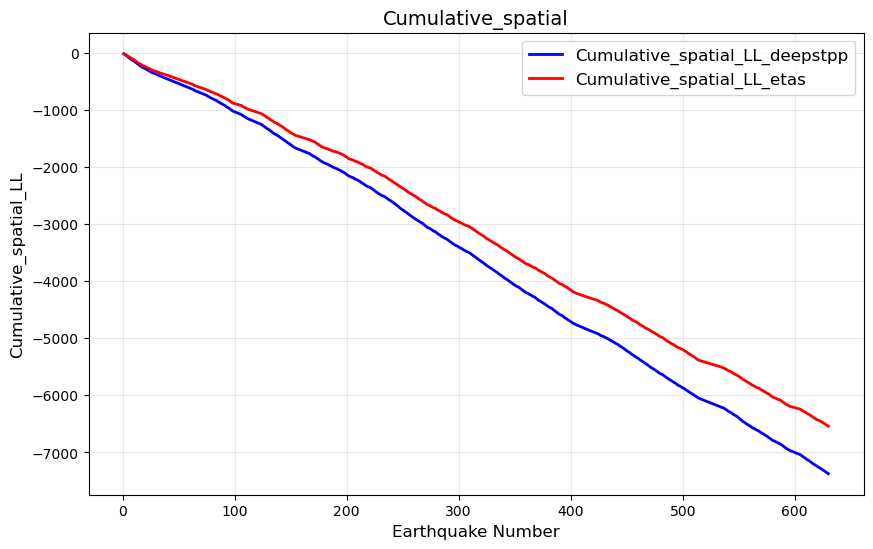

In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 封装读取 JSON 数据的函数
def load_json_data(filepath):
    with open(filepath, 'r') as f:
        return json.load(f)


# 封装提取 sll_all_scaled 数据的函数
def extract_sll_all_scaled(data):
    output_sll_all_scaled = []
    for results in data:
        output_sll_all_scaled.extend(results["sll_all_scaled"])
    return output_sll_all_scaled

##############################=====================================================================

# 主程序
filepath = '/home/tianweixi/Programe/EarthquakeNPP_CSEP_China/Experiment/AutoSTPP/data/loglikelihood/LLscores_CENC_M40_mag_seed_1555.json'

# 加载数据
#加载deepstpp
data_deepstpp = load_json_data(filepath)

#加载etas
data_etas = pd.read_csv('/home/tianweixi/Programe/EarthquakeNPP_CSEP_China/Experiment/ETAS/output_data_CENC/augmented_catalog.csv')
data_etas = data_etas[['time','SLL','TLL']].dropna()  #获取有值的行
data_etas = data_etas.reset_index(drop=True) #重置索引


# 提取 sll_all_scaled 数据
output_sll_all_scaled = extract_sll_all_scaled(data_deepstpp)
data_etas_sll = data_etas['SLL'].values.tolist()

#生成地震数量和Cumulative LL scores
Earthquake_Number = np.arange(1, len(output_sll_all_scaled) + 1) 
Cumulative_spatial_LL_deepstpp = np.cumsum(output_sll_all_scaled)
Cumulative_spatial_LL_etas = np.cumsum(data_etas_sll)

# 打印结果
# print("Earthquake Numbers:", Earthquake_Number)
# print("Cumulative_spatial_LL:", Cumulative_spatial_LL)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(Earthquake_Number, Cumulative_spatial_LL_deepstpp, label='Cumulative_spatial_LL_deepstpp', color='blue', linewidth=2)
plt.plot(Earthquake_Number, Cumulative_spatial_LL_etas, label='Cumulative_spatial_LL_etas', color='red', linewidth=2)
plt.title('Cumulative_spatial', fontsize=14)
plt.xlabel('Earthquake Number', fontsize=12)
plt.ylabel('Cumulative_spatial_LL', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

计算 CIG Spatial

DeepSTPP values higher  earthquake number: 135
Etas values higher  earthquake number: 495


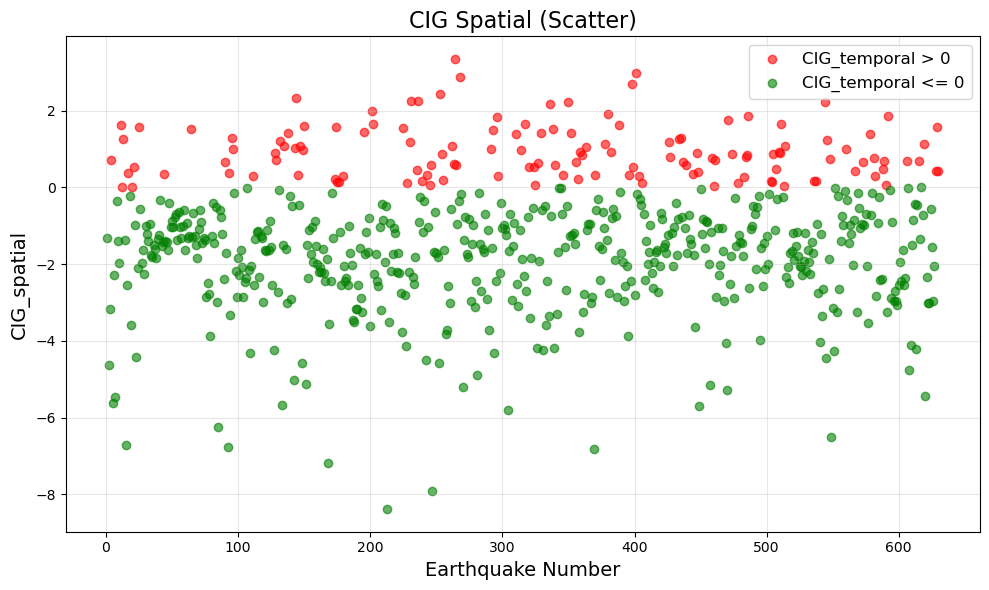

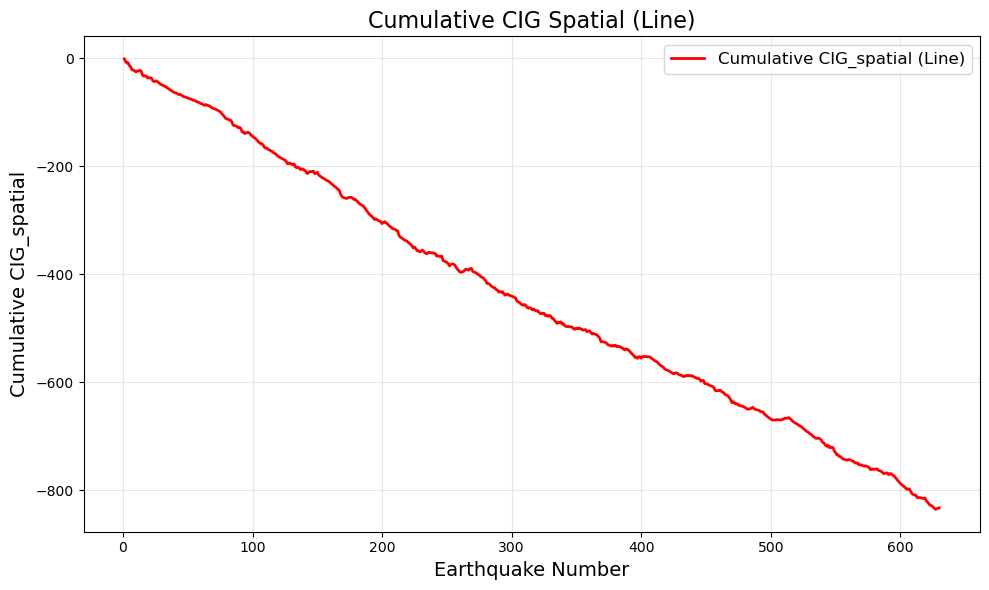

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 封装读取 JSON 数据的函数
def load_json_data(filepath):
    with open(filepath, 'r') as f:
        return json.load(f)

# 封装提取 sll_all_scaled 数据的函数
def extract_sll_all_scaled(data):
    output_sll_all_scaled = []
    for results in data:
        output_sll_all_scaled.extend(results["sll_all_scaled"])
    return output_sll_all_scaled

# 主程序
filepath = '/home/tianweixi/Programe/EarthquakeNPP_CSEP_China/Experiment/AutoSTPP/data/loglikelihood/LLscores_CENC_M40_mag_seed_1555.json'

# 加载数据
# 加载 DeepSTPP 数据
data_deepstpp = load_json_data(filepath)

# 加载 ETAS 数据
data_etas = pd.read_csv('/home/tianweixi/Programe/EarthquakeNPP_CSEP_China/Experiment/ETAS/output_data_CENC/augmented_catalog.csv')
data_etas = data_etas[['time', 'SLL', 'TLL']].dropna()  # 获取有值的行
data_etas = data_etas.reset_index(drop=True)  # 重置索引

# 提取 sll_all_scaled 数据
output_sll_all_scaled = extract_sll_all_scaled(data_deepstpp)
data_etas_sll = data_etas['SLL'].values.tolist()

# 生成地震数量和 Cumulative LL scores
Earthquake_Number = np.arange(1, len(output_sll_all_scaled) + 1)
CIG_spatial = np.array(output_sll_all_scaled) - np.array(data_etas_sll)

# 统计 DeepSTPP 相比 ETAS 更高的地震数量
higher_count = len(CIG_spatial[CIG_spatial > 0])
print('DeepSTPP values higher  earthquake number:', higher_count)
print('Etas values higher  earthquake number:', len(CIG_spatial[CIG_spatial < 0]))

# 累积值
Cumulative_CIG_spatial = np.cumsum(CIG_spatial)

# 绘图 1: 散点图
plt.figure(figsize=(10, 6))

#>0 和 < 0用两种颜色表示
plt.scatter(
    Earthquake_Number[CIG_spatial > 0], CIG_spatial[CIG_spatial > 0],
    label='CIG_temporal > 0', color='red', alpha=0.6
)
plt.scatter(
    Earthquake_Number[CIG_spatial <= 0], CIG_spatial[CIG_spatial <= 0],
    label='CIG_temporal <= 0', color='green', alpha=0.6
)

plt.title('CIG Spatial (Scatter)', fontsize=16)
plt.xlabel('Earthquake Number', fontsize=14)
plt.ylabel('CIG_spatial', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# 绘图 2: 线图
plt.figure(figsize=(10, 6))
plt.plot(Earthquake_Number, Cumulative_CIG_spatial, label='Cumulative CIG_spatial (Line)', color='red', linewidth=2)
plt.title('Cumulative CIG Spatial (Line)', fontsize=16)
plt.xlabel('Earthquake Number', fontsize=14)
plt.ylabel('Cumulative CIG_spatial', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


计算 CIG Temporal

DeepSTPP values higher  earthquake number: 376
Etas values higher earthquake number: 254


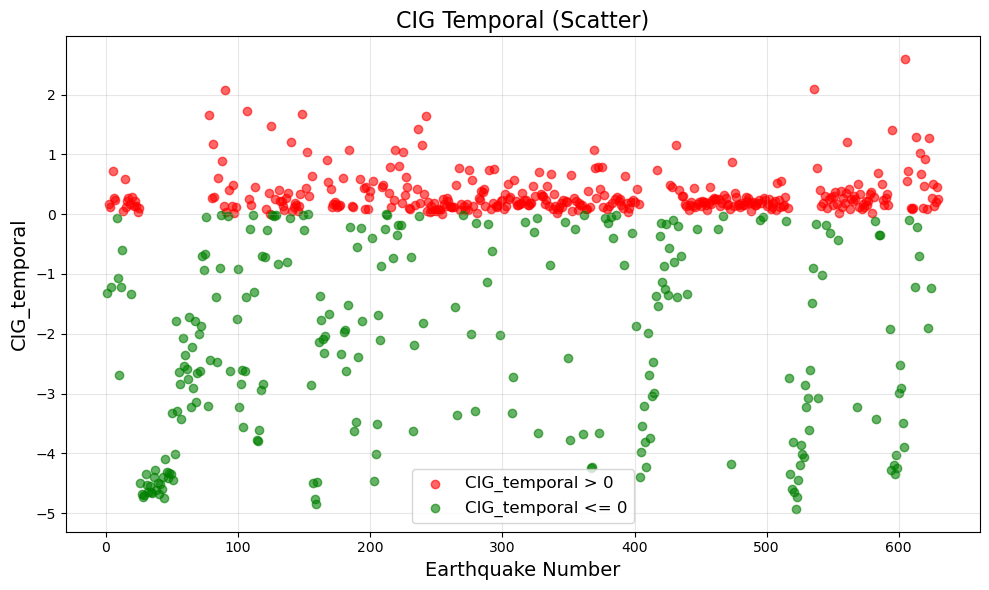

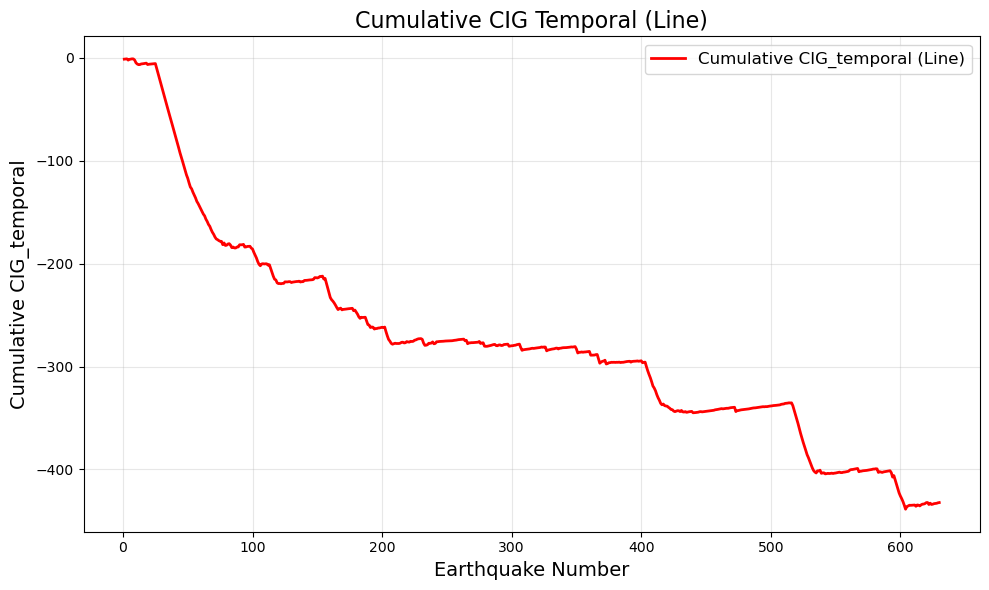

In [24]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 封装读取 JSON 数据的函数
def load_json_data(filepath):
    with open(filepath, 'r') as f:
        return json.load(f)

# 封装提取 tll_all_scaled 数据的函数
def extract_tll_all_scaled(data):
    output_tll_all_scaled = []
    for results in data:
        output_tll_all_scaled.extend(results["tll_all_scaled"])
    return output_tll_all_scaled

##############################=====================================================================

# 主程序
filepath = '/home/tianweixi/Programe/EarthquakeNPP_CSEP_China/Experiment/AutoSTPP/data/loglikelihood/LLscores_CENC_M40_mag_seed_1555.json'

# 加载数据
# 加载 deepstpp
data_deepstpp = load_json_data(filepath)

# 加载 etas
data_etas = pd.read_csv('/home/tianweixi/Programe/EarthquakeNPP_CSEP_China/Experiment/ETAS/output_data_CENC/augmented_catalog.csv')
data_etas = data_etas[['time', 'SLL', 'TLL']].dropna()  # 获取有值的行
data_etas = data_etas.reset_index(drop=True)  # 重置索引

# 提取 tll_all_scaled 数据
output_tll_all_scaled = extract_tll_all_scaled(data_deepstpp)
data_etas_tll = data_etas['TLL'].values.tolist()

# 生成地震数量和 CIG_temporal
Earthquake_Number = np.arange(1, len(output_tll_all_scaled) + 1)
CIG_temporal = np.array(output_tll_all_scaled) - np.array(data_etas_tll)

# 统计 DeepSTPP 相比 ETAS 更高的地震数量
higher_count = len(CIG_temporal[CIG_temporal > 0])
print('DeepSTPP values higher  earthquake number:', higher_count)
print('Etas values higher earthquake number:', len(CIG_temporal[CIG_temporal < 0]))

# 累积值
Cumulative_CIG_temporal = np.cumsum(CIG_temporal)

# 绘图 1: 散点图
plt.figure(figsize=(10, 6))

#>0 和 < 0用两种颜色表示
plt.scatter(
    Earthquake_Number[CIG_temporal > 0], CIG_temporal[CIG_temporal > 0],
    label='CIG_temporal > 0', color='red', alpha=0.6
)
plt.scatter(
    Earthquake_Number[CIG_temporal <= 0], CIG_temporal[CIG_temporal <= 0],
    label='CIG_temporal <= 0', color='green', alpha=0.6
)

plt.title('CIG Temporal (Scatter)', fontsize=16)
plt.xlabel('Earthquake Number', fontsize=14)
plt.ylabel('CIG_temporal', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# 绘图 2: 线图
plt.figure(figsize=(10, 6))
plt.plot(Earthquake_Number, Cumulative_CIG_temporal, label='Cumulative CIG_temporal (Line)', color='red', linewidth=2)
plt.title('Cumulative CIG Temporal (Line)', fontsize=16)
plt.xlabel('Earthquake Number', fontsize=14)
plt.ylabel('Cumulative CIG_temporal', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
